In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

plt.style.use('ggplot')
%matplotlib inline

In [138]:
df=pd.read_csv('AmesDummiesOrdinalF.csv',index_col=0)

In [139]:
df.head()

,TotalSF,TotalBsmtSF,LotArea,GarageArea,LotFrontage,OverallQual,BsmtScore,OverallCond,YearsAgoBuilt,MasVnrArea,...,HeatingQC,SaleType_ConLI,Heating_OthW,MasVnrType_BrkCmn,Foundation_BrkTil,GarageType_Basment,Neighborhood_ClearCr,Neighborhood_NWAmes,Foundation_Slab,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1710,856,8450,548,65.0,7,5.992928,5,8,196.0,...,5,0,0,0,0,0,0,0,0,208500
2,1262,1262,9600,460,80.0,6,4.995914,8,35,0.0,...,5,0,0,0,0,0,0,0,0,181500
3,1786,920,11250,608,68.0,7,5.989733,5,10,162.0,...,5,0,0,0,0,0,0,0,0,223500
4,1717,756,9550,642,60.0,7,4.981567,5,96,0.0,...,4,0,0,0,1,0,0,0,0,140000
5,2198,1145,14260,836,84.0,8,5.992378,5,11,350.0,...,5,0,0,0,0,0,0,0,0,250000


In [140]:
SalePrice=df.SalePrice
ridge_df=df.drop('SalePrice',axis=1)

### Standardize numeric columns

In [141]:
#check maximum value of each feature to decide which columns we want to normalize
list(map(lambda x:print(x,max(ridge_df[x])),ridge_df))

TotalSF 4476
TotalBsmtSF 3206
LotArea 215245
GarageArea 1390
LotFrontage 313.0
OverallQual 10
BsmtScore 5.997715851987209
OverallCond 9
YearsAgoBuilt 139
MasVnrArea 1600.0
WoodDeckSF 857
GarageAge 2011.0
GarageCars 4
TotalBath 6.0
EnclosedPorch 552
ScreenPorch 480
Neighborhood_StoneBr 1
PoolArea 738
TotRmsAbvGrd 14
Functional 8
BsmtExposure 4
Exterior_BrkFace 1
YearsSinceSale 5
KitchenQual 5
Neighborhood_NoRidge 1
SaleCondition_Family 1
3SsnPorch 508
BedroomAbvGr 8
SaleCondition_Abnorml 1
Condition_Artery 1
Neighborhood_NridgHt 1
Neighborhood_Crawfor 1
BsmtQual 6
SaleType_New 1
Fireplaces 3
ExterQual 5
MSZoning_FV 1
Condition_Feedr 1
Condition_RRAe 1
LotConfig_CulDSac 1
Neighborhood_Veenker 1
Neighborhood_Somerst 1
FireplaceQu 6
MoSold_Winter 1
Neighborhood_Edwards 1
CentralAir_N 1
Neighborhood_BrkSide 1
LotConfig_FR2 1
GarageFinish 4
GarageQual 6
GarageType_CarPort 1
Electrical_FuseA 1
Exterior_MetalSd 1
Exterior_WdShing 1
MSSubClass_70 1
Exterior_HdBoard 1
LowQualFinSF 572
Neighborho

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [142]:
'''The function to standardize the columns seperately. 
df - is the dataframe needs the standardization.  
collist - is the list of columns which need to be standardized'''


def standize_df(df,collist):
    for col in collist:
        stan_df=df[[col]]
        min_max_scaler = preprocessing.MinMaxScaler()
        standardized=min_max_scaler.fit_transform(stan_df)
        stan2_df=pd.DataFrame(standardized,columns=stan_df.columns,index=stan_df.index)
        df[[col]]=stan2_df
    return df


#standardize all columns
collist=list(ridge_df.columns) 

ridge_df=standize_df(ridge_df,collist)
ridge_df.head()

,TotalSF,TotalBsmtSF,LotArea,GarageArea,LotFrontage,OverallQual,BsmtScore,OverallCond,YearsAgoBuilt,MasVnrArea,...,Street_Grvl,HeatingQC,SaleType_ConLI,Heating_OthW,MasVnrType_BrkCmn,Foundation_BrkTil,GarageType_Basment,Neighborhood_ClearCr,Neighborhood_NWAmes,Foundation_Slab
Id,,,,,,,,,,,,,,,,,,,,,
1,0.332207,0.266999,0.033420,0.394245,0.150685,0.666667,0.999202,0.500,0.050725,0.12250,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.224046,0.393637,0.038795,0.330935,0.202055,0.555556,0.832969,0.875,0.246377,0.00000,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.350555,0.286962,0.046507,0.437410,0.160959,0.666667,0.998669,0.500,0.065217,0.10125,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333897,0.235808,0.038561,0.461871,0.133562,0.666667,0.830577,0.500,0.688406,0.00000,...,0.0,0.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.450024,0.357143,0.060576,0.601439,0.215753,0.777778,0.999110,0.500,0.072464,0.21875,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# Split the Ames_df into a 80% train-set and a 20% test set.
np.random.seed(19)
testIdxes = np.random.choice(range(1458), size= 292, replace=False)
trainIdxes = list(set(range(1458))-set(testIdxes))
trainX = ridge_df.iloc[trainIdxes]
testX  = ridge_df.iloc[testIdxes]
trainY = SalePrice.iloc[trainIdxes]
testY  = SalePrice.iloc[testIdxes]


#get best lambda
alphaRange = np.linspace(1e-3,200,40) # Use np.linspace to generate 40 alpha
ridge_cv = RidgeCV(alphas = alphaRange,cv=10) #cross validation to get best lambda
ridge_cv.fit(trainX, trainY)
best_alpha=ridge_cv.alpha_
best_alpha=round(best_alpha,3)
best_alpha

5.129

In [144]:
testX.head()

,TotalSF,TotalBsmtSF,LotArea,GarageArea,LotFrontage,OverallQual,BsmtScore,OverallCond,YearsAgoBuilt,MasVnrArea,...,Street_Grvl,HeatingQC,SaleType_ConLI,Heating_OthW,MasVnrType_BrkCmn,Foundation_BrkTil,GarageType_Basment,Neighborhood_ClearCr,Neighborhood_NWAmes,Foundation_Slab
Id,,,,,,,,,,,,,,,,,,,,,
419,0.193143,0.235808,0.032064,0.172662,0.133562,0.444444,0.831520,0.625,0.507246,0.00000,...,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
596,0.360212,0.565814,0.046750,0.545324,0.164384,0.777778,0.999795,0.500,0.036232,0.14875,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126,0.161999,0.313475,0.042693,0.483453,0.133562,0.333333,0.166730,0.500,0.398551,0.00000,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.211975,0.378041,0.042628,0.330935,0.212329,0.555556,0.977850,0.500,0.007246,0.00000,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.291405,0.480661,0.057978,0.606475,0.332192,0.666667,0.166730,0.500,0.065217,0.09375,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
#Train ridge
ridge=Ridge()
ridge.set_params(alpha=best_alpha)
ridge.fit(trainX,trainY)
ridge_intercept = ridge.intercept_
ridge_coef = pd.Series(ridge.coef_,index=ridge_df.columns)
rtrain_score=ridge.score(trainX,trainY)
rtest_score= ridge.score(testX,testY)

In [146]:
print ('intercept \t',ridge_intercept)
print ('train_score(R2)\t',rtrain_score)
print ('test_score(R2) \t',rtest_score)

intercept 	 -71193.96910743424
train_score(R2)	 0.8904834301682193
test_score(R2) 	 0.8984370633136243


In [147]:
ridge_predict = ridge.predict(testX)
RMSE=np.sqrt(mean_squared_error(testY,ridge_predict))
RMSE

21714.443949252523

In [148]:
#Sorted the coefs, the larger the number is , the larger impact it has to the whole model
#showing the top 60 features
sorted_coef=abs(ridge_coef).sort_values(ascending=False)
sorted_coef[0:59]
sorted_coef.BsmtScore

11732.98317748075

In [167]:
PredictionsTest=ridge.predict(testX)
RMSLEvalue = np.sqrt(np.mean(np.power(np.log1p(testY)-np.log1p(PredictionsTest), 2)))
RMSLEvalue

0.13371802961456117

In [150]:
#sorted_coef.to_csv('sorted_coef_ridge_new.csv')

In [151]:
ridge_coef.sort_values(ascending=False)


TotalSF                  120244.708730
TotalBsmtSF               75313.500869
OverallQual               71673.501853
TotRmsAbvGrd              53648.436895
MasVnrArea                49328.874759
Neighborhood_NoRidge      42719.625108
Neighborhood_StoneBr      39782.881455
LotArea                   39171.257704
KitchenQual               32979.549873
LotFrontage               32620.477813
OverallCond               31375.369550
TotalBath                 30602.624508
GarageArea                30518.625840
Neighborhood_NridgHt      26231.265400
PoolArea                  25747.858192
ExterQual                 25016.245401
Fireplaces                24349.921982
Functional                24213.860272
SaleType_New              23175.459615
Neighborhood_Crawfor      22648.716042
Foundation_Slab           22168.103946
GarageCars                21253.693998
BsmtExposure              17722.749622
GarageAge                 15516.713602
ScreenPorch               15413.264942
WoodDeckSF               

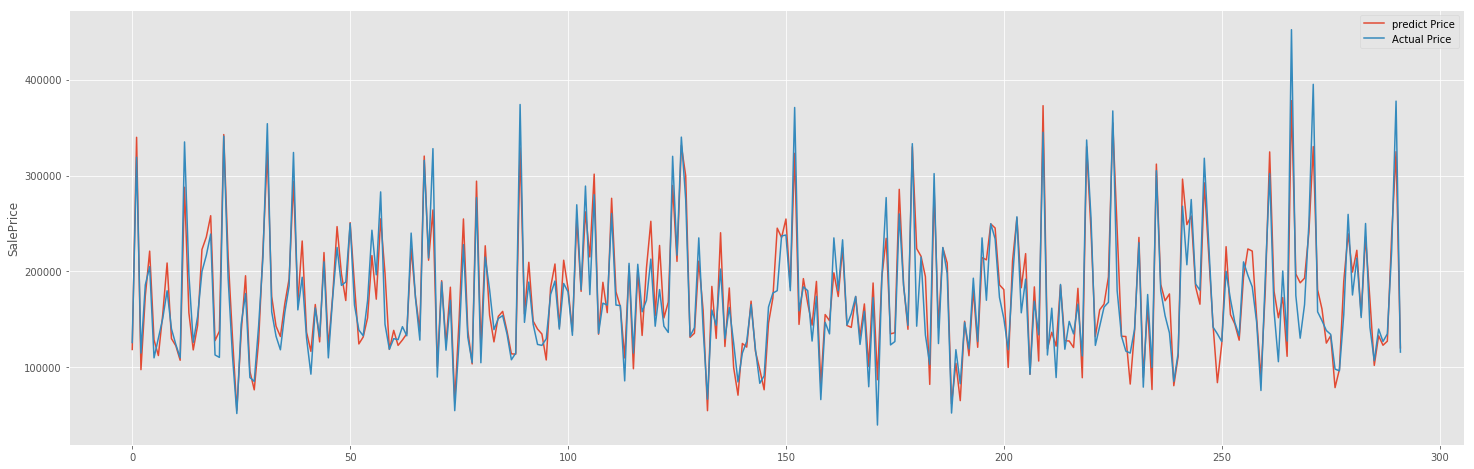

In [184]:
plt.figure(figsize=(25,8))
plt.plot(range(292),ridge_predict,label="predict Price")
plt.plot(range(292),testY,label="Actual Price")
plt.legend(loc='best')
plt.ylabel('SalePrice')
plt.show()